In [1]:
import altair as alt
from altair import datum
import pandas as pd
from vega_datasets import data

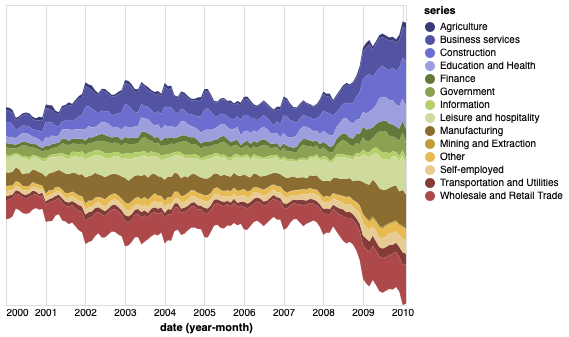

In [2]:
source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

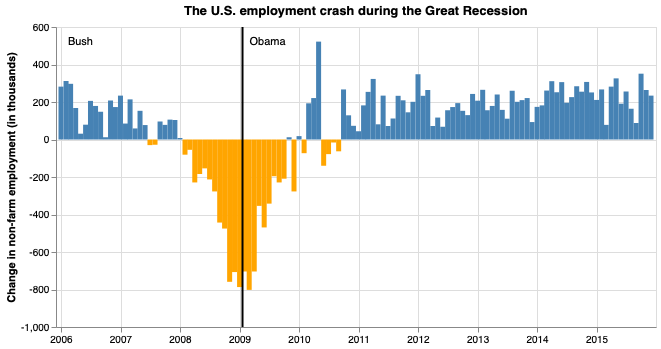

In [3]:
source = data.us_employment()
presidents = pd.DataFrame([
    {
        "start": "2006-01-01",
        "end": "2009-01-19",
        "president": "Bush"
    },
    {
        "start": "2009-01-20",
        "end": "2015-12-31",
        "president": "Obama"
    }
])

bars = alt.Chart(
    source,
    title="The U.S. employment crash during the Great Recession"
).mark_bar().encode(
    x=alt.X("month:T", title=""),
    y=alt.Y("nonfarm_change:Q", title="Change in non-farm employment (in thousands)"),
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),
        alt.value("orange")
    )
)

rule = alt.Chart(presidents).mark_rule(
    color="black",
    strokeWidth=2
).encode(
    x='end:T'
).transform_filter(alt.datum.president == "Bush")

text = alt.Chart(presidents).mark_text(
    align='left',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='start:T',
    x2='end:T',
    text='president',
    color=alt.value('#000000')
)

(bars + rule + text).properties(width=600)

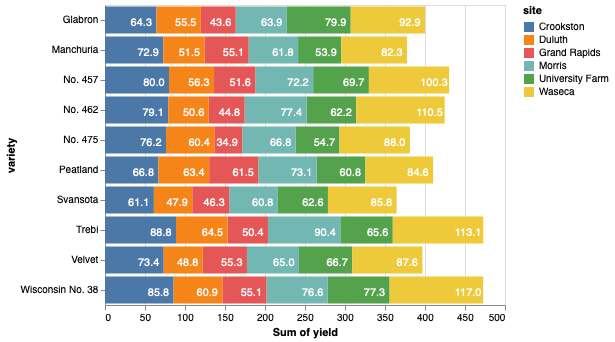

In [4]:
source=data.barley()

bars = alt.Chart(source).mark_bar().encode(
    x=alt.X('sum(yield):Q', stack='zero'),
    y=alt.Y('variety:N'),
    color=alt.Color('site')
)

text = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('sum(yield):Q', stack='zero'),
    y=alt.Y('variety:N'),
    detail='site:N',
    text=alt.Text('sum(yield):Q', format='.1f')
)

bars + text

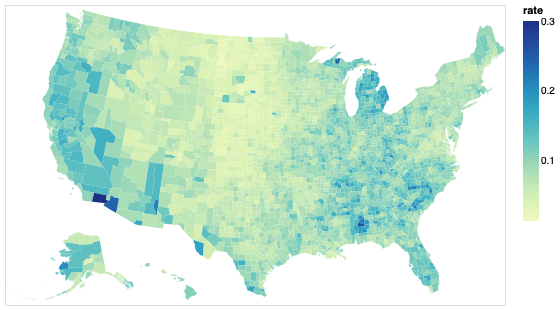

In [5]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

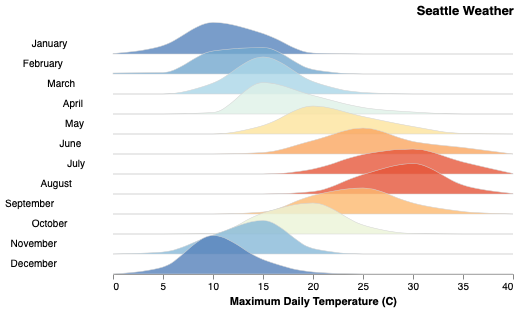

In [6]:
source = data.seattle_weather.url

step = 20
overlap = 1

alt.Chart(source).transform_timeunit(
    Month='month(date)'
).transform_joinaggregate(
    mean_temp='mean(temp_max)', groupby=['Month']
).transform_bin(
    ['bin_max', 'bin_min'], 'temp_max'
).transform_aggregate(
    value='count()', groupby=['Month', 'mean_temp', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Month', 'mean_temp'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q', bin='binned', title='Maximum Daily Temperature (C)'),
    alt.Y(
        'value:Q',
        scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
    ),
    alt.Fill(
        'mean_temp:Q',
        legend=None,
        scale=alt.Scale(domain=[30, 5], scheme='redyellowblue')
    ),
    alt.Row(
        'Month:T',
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
    )
).properties(
    bounds='flush', title='Seattle Weather', height=step
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

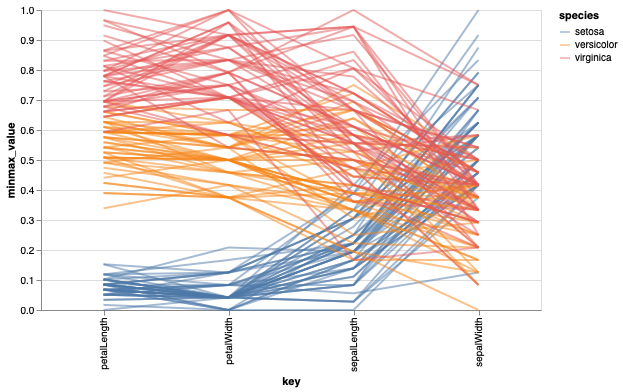

In [7]:
source = data.iris()

alt.Chart(source).transform_window(
    index='count()'
).transform_fold(
    ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    x='key:N',
    y='minmax_value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

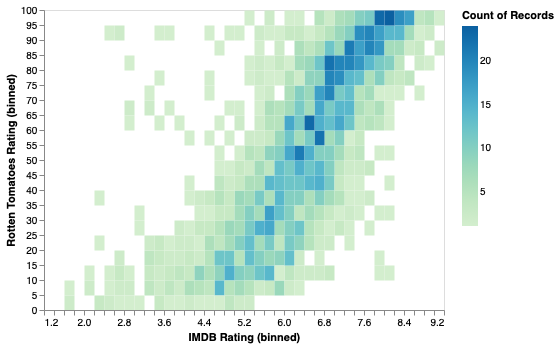

In [8]:
source = data.movies.url

alt.Chart(source).mark_rect().encode(
    alt.X('IMDB Rating:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('Rotten Tomatoes Rating:Q', bin=alt.Bin(maxbins=40)),
    alt.Color('count(IMDB Rating):Q', scale=alt.Scale(scheme='greenblue'))
)

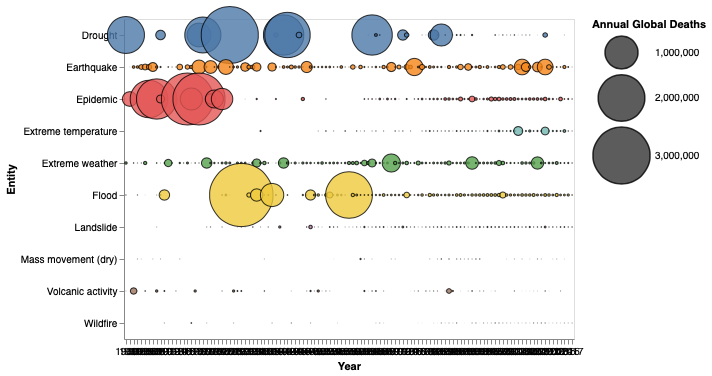

In [9]:
source = data.disasters.url

alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
    alt.Y('Entity:N'),
    alt.Size('Deaths:Q',
        scale=alt.Scale(range=[0, 4000]),
        legend=alt.Legend(title='Annual Global Deaths')
    ),
    alt.Color('Entity:N', legend=None)
).properties(
    width=450,
    height=320
).transform_filter(
    alt.datum.Entity != 'All natural disasters'
)